In [1]:

import multiprocessing
print(multiprocessing.cpu_count())

import psutil
print(f"Available memory before training: {psutil.virtual_memory().available / 1e9:.2f} GB")

12
Available memory before training: 9.11 GB


In [2]:

import numpy as np
import pandas as pd
pd.set_option('display.max_info_columns', 200) #caps at 200, use None to show all
pd.set_option('display.max_rows', 200)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time
import joblib
import pickle


In [3]:

study = pd.read_pickle("p004_diabetes_MLprep.pkl")
print(study.shape)

(78743, 176)


In [4]:

X=pd.read_pickle("p24_X_with_proba.pkl")
xgb_proba =  X['predict_proba']   # Keep only the probability for the positive class (1)
print(xgb_proba.shape)

(78743,)


In [5]:

study['xgb'] = xgb_proba
study=study[ ['encounter_ct','readmitted_ind', 'xgb'] ].copy(deep=True)
print(study.shape)

(78743, 3)


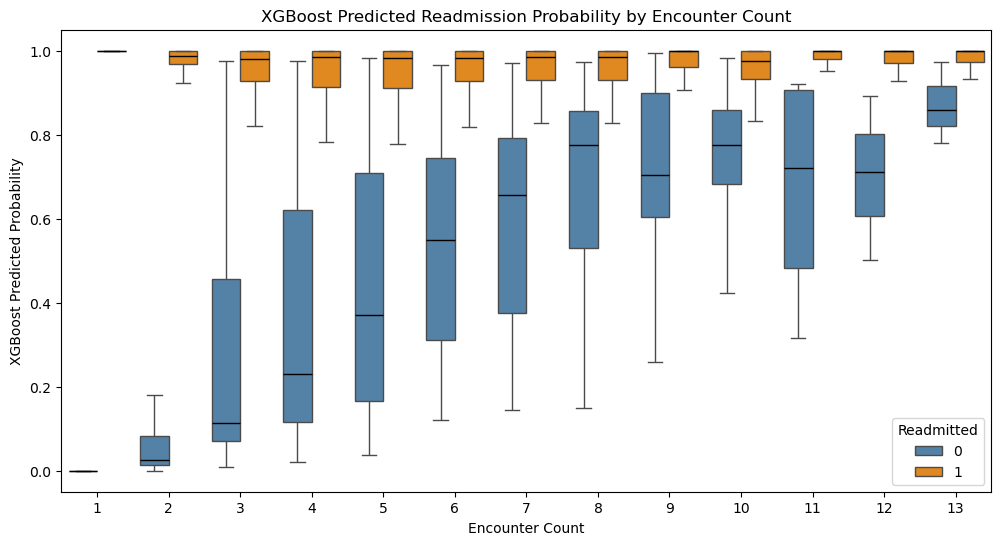

In [6]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=study, 
    x="encounter_ct", 
    y="xgb", 
    hue="readmitted_ind",
    showfliers=False, 
    medianprops={'color': 'black'},
    palette={0: "steelblue", 1: "darkorange"}
)

plt.xlabel("Encounter Count")
plt.ylabel("XGBoost Predicted Probability")
plt.title("XGBoost Predicted Readmission Probability by Encounter Count")
plt.legend(title="Readmitted", loc="lower right")
plt.show()


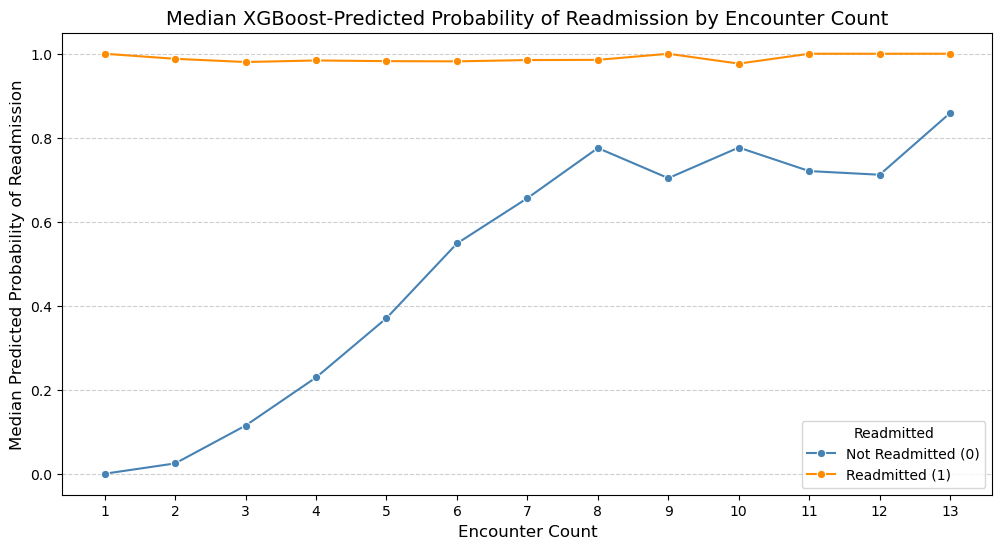

In [7]:

# Compute median 'predict_prob' for each encounter_ct, grouped by readmitted_ind
median_probs = study.groupby(['encounter_ct', 'readmitted_ind'])['xgb'].median().reset_index()

# Convert encounter_ct to categorical to remove gaps
median_probs['encounter_ct'] = median_probs['encounter_ct'].astype(str)  

# Set figure size
plt.figure(figsize=(12, 6))

# Define a consistent color palette
palette = {0: "steelblue", 1: "darkorange"}

# Line plot
sns.lineplot(
    data=median_probs, 
    x="encounter_ct", 
    y="xgb", 
    hue="readmitted_ind",  
    marker="o",  
    palette=palette  
)

# Customize labels and title
plt.xlabel("Encounter Count", fontsize=12)
plt.ylabel("Median Predicted Probability of Readmission", fontsize=12)
plt.title("Median XGBoost-Predicted Probability of Readmission by Encounter Count", fontsize=14)

# Fix legend colors and position
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Not Readmitted (0)", "Readmitted (1)"], title="Readmitted", loc="lower right")

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()